# Q6

In [16]:
import pandas as pd

In [25]:

df = pd.read_csv('Iris.csv', sep=',')
df

,Unnamed: 0,Class,Petal length,Sepal length,Sepal width,Petal width
0,0,1,51,35,14,2
1,1,1,49,30,14,2
2,2,1,47,32,13,2
3,3,1,46,31,15,2
4,4,1,50,36,14,2
...,...,...,...,...,...,...
145,145,3,67,30,52,23
146,146,3,63,25,50,19
147,147,3,65,30,52,20
148,148,3,62,34,54,23


In [33]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
x = df.drop('Class', axis=1)
y = df['Class']

In [34]:
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
from copy import deepcopy

loo = LeaveOneOut()
accuracy = 0
linearSVM = svm.SVC(kernel='linear', max_iter=100000)

y_predict = deepcopy(y)
for (train_index, test_index) in loo.split(x):
      linearSVM.fit(x.iloc[train_index], y[train_index])
      accuracy += linearSVM.score(x.iloc[test_index],y[test_index])
      y_predict[test_index] = linearSVM.predict(x.iloc[test_index])
accuracy /= x.shape[0]
print(f"error is {100-accuracy*100:.2f}")


error is 2.67


In [38]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y,y_predict)
confusion

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

در این ماتریس همانطور که کاملا مشخص است اغلب تمامی 50 داده مربوط به کلاس 1 را درست پیش بینی کرده است.
تعداد 47 تا از 50 داده مربوط به کلاس 2 را درست پیش بینی کرده و 3 تا از آنها را به اشتباه کلاس  3 پیش بینی کرده است.
همچنین از 50 داده مربوط به کلاس 3 تعدا 49 تا را درست پیش بینی کرده است و یکی از آنها را به اشتباه کلاس 2 پیش بینی کرده است.

# 1

In [29]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [30]:
from sklearn.svm import SVC

error = []
degree = []
for i in range(10):
    loo = LeaveOneOut()
    accuracy = 0
    polySVM = svm.SVC(kernel='poly', degree=i+1, max_iter=100000)
    y_predict = deepcopy(y)
    for (train_index, test_index) in loo.split(x):
        polySVM.fit(x.iloc[train_index], y[train_index])
        accuracy += polySVM.score(x.iloc[test_index],y[test_index])
        y_predict[test_index] = polySVM.predict(x.iloc[test_index])
    accuracy /= x.shape[0]
    error.append(100-accuracy*100)
    degree.append(i+1)
    print(f'{i+1} finished with {error[i]}')
print(error)


1 finished with 4.0
2 finished with 2.666666666666657
3 finished with 4.666666666666657
4 finished with 2.666666666666657
5 finished with 2.666666666666657
6 finished with 4.666666666666657
7 finished with 4.0
8 finished with 5.333333333333329
9 finished with 16.666666666666657
10 finished with 29.33333333333333
[4.0, 2.666666666666657, 4.666666666666657, 2.666666666666657, 2.666666666666657, 4.666666666666657, 4.0, 5.333333333333329, 16.666666666666657, 29.33333333333333]


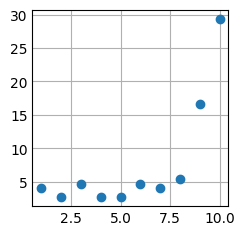

In [31]:
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

x = degree
y = error

fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()

همانطور که در نمودار مشخص است بد از درجه 5 مدل ما اور فیت میشود پس باید مینیمم را از بین 1 تا 5 انتخاب کنیم. درجه های 2 و 4 و 5 مقدار های مینیمم را دارند و هر سه مقدار یکسانی دارند چون مقدار آنها یکسان است اولویت ما با مدل ساده تر است پس درجه دو را انتخاب خواهیم کرد.

2

In [50]:

loo = LeaveOneOut()
polySVM = svm.SVC(kernel='poly', degree=2, max_iter=100000)
y_predict = deepcopy(y)
for (train_index, test_index) in loo.split(x):
        polySVM.fit(x.iloc[train_index], y[train_index])
        y_predict[test_index] = polySVM.predict(x.iloc[test_index])



In [51]:
confusion = confusion_matrix(y,y_predict)
confusion

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

خیلی شبیه به حالت خطی پیش بینی کرده است هر دو 4 داده را اشتباه پیش بینی کرده اند و یک درصد خطا دارند اما این چند جمله ای برای کلاس دوم پیش آمار بهتری دارد چون 48 تا پیش بینی صحیح دارد در صورتی که دیگری 47 اما در کلاس سوم آن که خطی عمل کرده پیش بینی بهتری دارد و 49 تا پیش بینی صحیح دارد در صورتی که این چند جمله ای 48 تا پیش بینی صحیح دارد. همچنین این چند جمله ای با احتمال کاملا یکسان بین سه کلاس عمل کرده و از هر کدام 50 تا پیش بینی دارد در صورتی که دیگری که خطی بود یکمی بیشتر از کلاس سوم پیشبینی می کرد.